# Simulation using Epigeopop

This walk-through follows the basic instructions for a simulation using Epigeopop in README, but includes further details, especially for generating a population using the EpiGeoPop repository.

Please use the other example notebook, toypop_example.ipynb, for a walk-through of a simulation using a toy population.

## Step 1. Set up rEpiabm

### Instructions

1. Clone the Github rEpiabm repository using your preferred method. Example below uses terminal command:
    ```
    git clone git@github.com:SABS-R3-Epidemiology/rEpiabm.git
    cd rEpiabm
    ```

2. Go to your github personal Settings/Developer Settings

    <img src="../images/Settings.jpg" width="30%" style="display: inline-block;"> <img src="../images/Developer.jpg" width="30%" style="display: inline-block;">


3. Create a new personal access token (fine-grained)

    <img src="../images/fine-grained.jpg" width="50%"> 

    **NB. *Make sure you copy your token!***

4. Launch RStudio and in the console enter

    ```file.edit("~/.Renviron")```

5. In the .Renviron file, add the line

    ```GITHUB_PAT=<your_personal_access_token>```

    where the above is your real token from Github, and make sure to **save** the file.

    <img src="../images/token.jpg" width="50%"> <br>

6. Restart RStudio

7. Enter in R console:
    ```
    install.packages("devtools")
    devtools::install_github("SABS-R3-Epidemiology/rEpiabm")
    ```
8. Copy the example 'Andorra' folder structure within the data folder and name it with your country (capitalise the intial letter) and include the file as you will need to edit it for your simulation.

    <img src="../images/andorra_file_structure.png" width="50%"> <br>
    

    <img src="../images/your_country.png" width="50%"> 

You are now ready to generate your population.

### Step 2. Generate your Github repository EpiGeoPop

Clone the repository
```
git clone git@github.com:SABS-R3-Epidemiology/EpiGeoPop.git
cd EpiGeoPop
```

The directory structure should be as below:

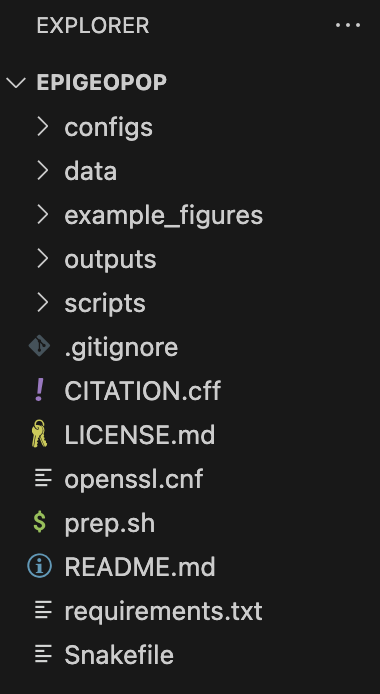

Create a python 3.11 environment as it will not run on python 3.12:

On a mac:
/usr/local/opt/python@3.11/bin/python3.11 -m venv .venv


Activate the environment:
source .venv/bin/activate

Install the dependencies:
pip install -r requirements.txt

It may crash with an error ending:


      <string>:78: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
      WARNING:root:Failed to get options via gdal-config: [Errno 2] No such file or directory: 'gdal-config'
      CRITICAL:root:A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
      [end of output]

  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error
× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.
note: This error originates from a subprocess, and is likely not a problem with pip.


This is because Fiona, which is a Python package for reading and writing spatial data, requires GDAL (Geospatial Data Abstraction Library) to be installed on your system first.

On a mac, you can install as follows:

brew install gdal
export GDAL_CONFIG=/usr/local/bin/gdal-config
export GDAL_VERSION=$(gdal-config --version)

To select a region of interest:

go to configs/countries

Copy one of the parameter json files

Change household_size_distribution figures to your household distribution.
  '''
  "household_size_distribution": [0.228400, 0.252600, 0.252600, 0.110500,
                                	0.110400, 0.020000, 0.015000, 0.005500,
                                    0.002500, 0.002500]
  '''
Change line 16 to the country of your choice, for example:
    "country": "Andorra",

Save file

Next, the file "prep.sh" downloads data from two different websites. However, the websites have been updated so the following changes need to be made:
comment out the first 'curl' line

curl -O https://jeodpp.jrc.ec.europa.eu/ftp/jrc-opendata/GHSL/GHS_POP_MT_GLOBE_R2019A/GHS_POP_E2015_GLOBE_R2019A_4326_30ss/V1-0/GHS_POP_E2015_GLOBE_R2019A_4326_30ss_V1_0.zip
and replace with 

curl -O https://jeodpp.jrc.ec.europa.eu/ftp/jrc-opendata/GHSL/GHS_POP_GLOBE_R2023A/GHS_POP_E2025_GLOBE_R2023A_4326_30ss/V1-0/GHS_POP_E2025_GLOBE_R2023A_4326_30ss_V1_0.zip

Then copy the filename from the end of the path, GHS_POP_E2025_GLOBE_R2023A_4326_30ss_V1_0.zip, 
and replace the filename after 'unzip' command:

unzip GHS_POP_E2025_GLOBE_R2023A_4326_30ss_V1_0.zip

Finally, comment out the remaining lines of code. We will need to download the files from the website directly.

Save the file and run the file:
bash prep.sh

Go here https://www.naturalearthdata.com/downloads/10m-cultural-vectors/
and click on the link:
Download without boundary lakes
https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries_lakes.zip
and save in the folder (which was created by prep.sh):
(data/raw)

These datafiles will be used by Snakefile to create the csv file. However, the Snakefile needs to be amended as follows:
Open the Snakefile, amend row 8 to be the country of your choice (replace Luxembourg)

        "data/processed/countries/Luxembourg_microcells.csv",

    comment out row 9:
        "data/processed/countries/Luxembourg_pop_dist.json",
    
    comment out row 19:
        "outputs/dag.pdf"

    comment out the first rule:
    rule render_dag:
    input:
        "Snakefile"
    output:
        "outputs/dag.pdf"
    shell:
        "snakemake --dag | dot -Tpdf > outputs/dag.pdf"

Replace the 'tif' file references in row 31, 40 and 49 with the following:

GHS_POP_E2025_GLOBE_R2023A_4326_30ss_V1_0.tif

as this is the new file downloaded using prep.sh

Finally, scroll to the bottom of Snakefile and comment out the following:

rule make_pop_dist:
    input:
        "data/raw/WPP2022_PopulationByAge5GroupSex_Medium.csv",
        "configs/{region}/{place}_parameters.json"
    output:
        "data/processed/{region}/{place}_pop_dist.json"
    script:
        "scripts/get_pop_dist.py"

as this is not needed.

Run the tool using:
snakemake --cores 1

INCLUDE population density map

However, it should produce an output file in data/processed folder:
